In [ ]:
# Setting up google drive 
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# import sys
# sys.path.append('/content/gdrive/MyDrive/Colab Notebooks')

In [1]:
import my_utils as mu
import torch
from torch import nn
from IPython import display

D:\Python3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'D:\Python3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


# The Task

* Our goal for this week is to ensure that we have understood the pipeline for training a model using PyTorch. The pipeline consists of:
    1. Read the dataset and create the appropriate dataloaders. 
    1. Create and initialise the model.
    1. Create the loss and the optimizer.
    1. Create the training function.
    1. Train and evaluate the model.
* Hence there will be no new **Task** for this week but you should have more time to:
    1. Go through the task from Week 3 and if needed ask us additional questions.
    1. Run the notebook from Week 4 on Softmax Regression. For your convenience the notebook is provided below. Make sure you understand the provided pipeline!
    1. If you have done so there are **2 optional tasks** at the end of the notebook!
    
* The Learning Outcome: Hands-on application of PyTorch's API for solving Softmax Regression.

# Concise Implementation of Softmax Regression

* Goal: use high-level APIs of PyTorch for implementing Softmax Regression for classification. 

In [2]:
batch_size = 256
train_iter, test_iter = mu.load_data_fashion_mnist(batch_size)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [3]:
X, y = next(iter(train_iter)) # first batch
print(X.size())
print(y)

torch.Size([256, 1, 28, 28])
tensor([8, 2, 5, 6, 0, 5, 7, 2, 7, 5, 2, 1, 9, 7, 8, 3, 2, 9, 1, 0, 8, 6, 1, 1,
        6, 2, 5, 2, 2, 5, 8, 6, 5, 6, 2, 4, 2, 4, 4, 8, 1, 4, 9, 5, 4, 2, 5, 0,
        8, 1, 2, 3, 5, 7, 0, 4, 5, 3, 7, 1, 0, 9, 9, 9, 9, 8, 9, 0, 0, 5, 1, 6,
        7, 1, 3, 6, 0, 4, 0, 0, 4, 1, 4, 9, 9, 8, 0, 5, 3, 8, 1, 4, 4, 1, 9, 0,
        4, 2, 9, 5, 2, 9, 2, 3, 7, 6, 2, 8, 8, 4, 9, 6, 1, 5, 3, 1, 7, 5, 1, 8,
        8, 2, 9, 0, 5, 4, 7, 8, 9, 8, 9, 3, 1, 5, 4, 8, 4, 9, 4, 9, 2, 9, 7, 3,
        0, 6, 8, 1, 2, 4, 1, 7, 1, 4, 7, 1, 2, 7, 0, 0, 7, 4, 3, 4, 3, 1, 9, 8,
        4, 3, 4, 4, 0, 5, 0, 5, 2, 1, 4, 4, 1, 9, 7, 8, 7, 4, 5, 5, 9, 8, 3, 9,
        1, 2, 7, 5, 3, 4, 8, 0, 1, 4, 3, 0, 8, 6, 7, 0, 3, 5, 7, 9, 4, 0, 7, 8,
        4, 8, 3, 5, 4, 7, 1, 5, 1, 6, 0, 4, 7, 8, 5, 3, 6, 3, 3, 0, 6, 2, 4, 1,
        1, 2, 9, 1, 7, 0, 3, 1, 1, 2, 1, 9, 4, 4, 5, 3])


# Defining the Model and Initialization

* Each example is represented by a fixed-length vector: we flatten each $28 \times 28$ image, treating it as vector of length 784.

* Because our dataset has 10 classes, our network will have an output dimension of 10.
* So, our weights `W` will be a $784 \times 10$ matrix and the biases `b` will constitute a $10 \times 1$ row vector.
* We initialize `W` using a Gaussian distribution and `b` with 0.
* Softmax regression can be implemented as a Fully-Connected (i.e Linear) layer.


In [16]:
class Net(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        num_hidden = 40
        self.num_outputs = num_outputs
        self.Linear1 = nn.Linear(num_inputs, num_hidden)
        self.Linear2 = nn.Linear(num_hidden, num_outputs)
        torch.nn.init.normal_(self.Linear1.weight, std=0.01) #init the weights
        torch.nn.init.zeros_(self.Linear1.bias) #init the bias
        
    def forward(self, x):
        x = x.view(-1, self.num_inputs)
        out = self.Linear1(x)
        return out

num_inputs, num_outputs = 784, 10
net = Net(num_inputs, num_outputs)

# Alternative Initialization
* This is useful if you have multiple layers of the same type and you want them to be initialized in the same way.

In [5]:
def init_weights(m):
    if isinstance(m, nn.Linear): # by checking the type we can init different layers in different ways
        torch.nn.init.normal_(m.weight, std=0.01)
        torch.nn.init.zeros_(m.bias)

net.apply(init_weights);
# print(net)

# Loss Function

* Use PyTorch's implementation of Softmax-Cross Entropy loss to avoid numerical instabilities
    * The input to loss function are the logits $\mathbf{o}$ (and not softmax outputs)

In [6]:
loss = nn.CrossEntropyLoss()

# Optimization Algorithm

* Minibatch SGD with a learning rate of 0.1 as the optimization algorithm.


In [7]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

# Evaluation


In [8]:
def accuracy(y_hat, y):  #y_hat is a matrix; 2nd dimension stores prediction scores for each class.
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1) # Predicted class is the index of max score         
    cmp = (y_hat.type(y.dtype) == y)  # because`==` is sensitive to data types
    return float(torch.sum(cmp)) # Taking the sum yields the number of correct predictions.

# Example: only 1 sample is correctly classified.
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
accuracy(y_hat, y) / len(y)

0.5

In [9]:
class Accumulator:  
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # [0, 0, ..., 0]
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [10]:
def evaluate_accuracy(net, data_iter): 
    """Compute the accuracy for a model on a dataset."""
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions
    for _, (X, y) in enumerate(data_iter):
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

* The accuracy of the model prior to training should be close to random guessing, i.e., 0.1 for 10 classes.


In [11]:
evaluate_accuracy(net, test_iter)

0.1252

# Training

* The training loop for softmax regression looks strikingly familiar with that of linear regression 
* Here we refactor the implementation to make it reusable.
    * First, we define a function to train for one epoch.

In [12]:
def train_epoch_ch3(net, train_iter, loss, optimizer, batch_size=256, num_outputs=10):  
    """The training function for one epoch."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        metric.add(float(l) * len(y), accuracy(y_hat, y), y.size().numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

# Training

* The following class will be used to plot training and validation accuracy as well as loss evolution over training loop 
* Not important to understand how this code works, we just need to use it for plotting.

In [13]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        mu.use_svg_display()
        self.fig, self.axes = mu.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: mu.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

# Training

* The following function trains the model (`net`) on a training set (`train_iter`) for `num_epochs`.
* At the end of each epoch, the model is evaluated on a testing set (`test_iter`).
* `Animator` for visualizing the training progress.

In [14]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer):  #@save
    """Train a model."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

KeyboardInterrupt: 

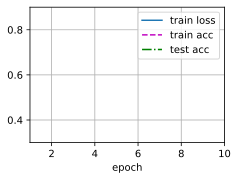

In [17]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)

# Optional Tasks

* Task 1: The model defined above has 1 Linear (or Fully-Connected Layer). Expand your `Net` class to have one more linear layer as follows: the 1st Linear layer will output `num_hidden` outputs. Set `num_hidden=40`. The second linear layer will have `num_hidden` inputs and 10 outputs (i.e. equal to the number of classes). Train this model and check its accuracy. Is it better than in terms of accuracy than your original model? Can you justify your answer? 
* Task 2: We trained our original model using CE Loss. Can you modify the code to train it with MSE Loss? Hints:  
    * You will need to write some code to convert the labels into 1-hot encoding (do that inside the training loop).
    * You might have to adjust the learning rate.